## Name:Urvashi Bisen
## Roll No:20
## Batch:B2
## Practical 5



### 1. Perform the EDA.

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
train_data = pd.read_csv('titanic.csv')

In [21]:
# Check for missing values
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [22]:
# Fill missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
train_data.drop(columns='Cabin', inplace=True)


In [23]:
print(train_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [24]:
# Convert categorical variables into numeric
train_data['Sex'] = train_data['Sex'].map({'male': 1, 'female': 0})
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Feature Engineering (e.g., extract title from name)
train_data['Title'] = train_data['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
print(train_data['Title'].value_counts())

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64


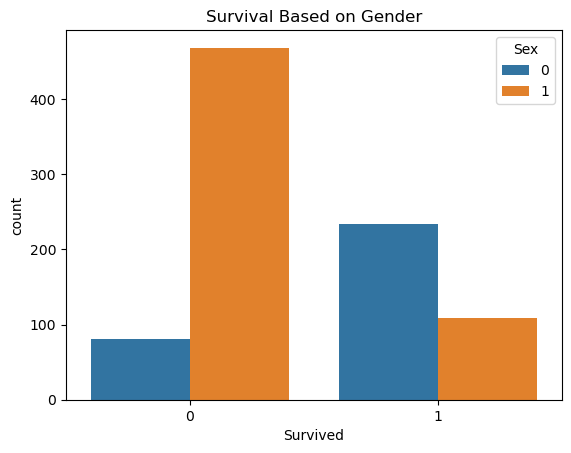

In [25]:
# Visualizations
sns.countplot(data=train_data, x='Survived', hue='Sex')
plt.title('Survival Based on Gender')
plt.show()

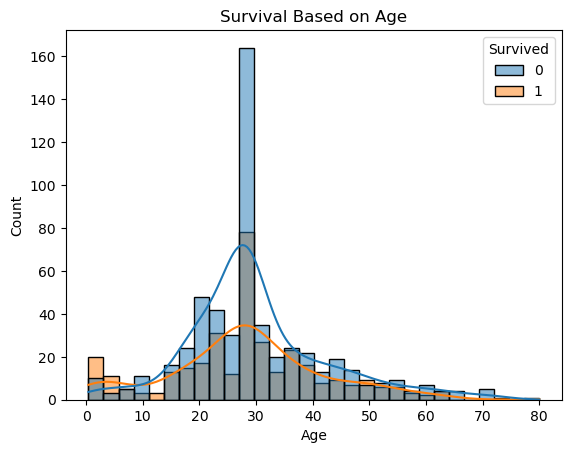

In [36]:
sns.histplot(data=train_data, x='Age', hue='Survived', kde=True)
plt.title('Survival Based on Age')
plt.show()

### 2. Apply Naive Bayes classifier.

### Importing neccessary libraries, Performing train test split and training the Gaussian Naive Bayes Model (Because there is continous values which follow normal(gaussian distribution))

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

X = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = train_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)


### 3. Evaluate the performance using Precision, Recall, F1 score and accuracy.

In [34]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Precision: 0.7297
Recall: 0.7297
F1 Score: 0.7297
Accuracy: 0.7765


### 4. Apply hyper parameter tuning to improve performance.

In [35]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Accuracy from Grid Search: {best_accuracy:.4f}")

# Predict using the best estimator
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate again with tuned model
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f"Tuned Precision: {precision_best:.4f}")
print(f"Tuned Recall: {recall_best:.4f}")
print(f"Tuned F1 Score: {f1_best:.4f}")
print(f"Tuned Accuracy: {accuracy_best:.4f}")


Best Parameters: {'var_smoothing': 1e-09}
Best Accuracy from Grid Search: 0.7977
Tuned Precision: 0.7297
Tuned Recall: 0.7297
Tuned F1 Score: 0.7297
Tuned Accuracy: 0.7765
